In [1]:
pip install pandas numpy networkx matplotlib

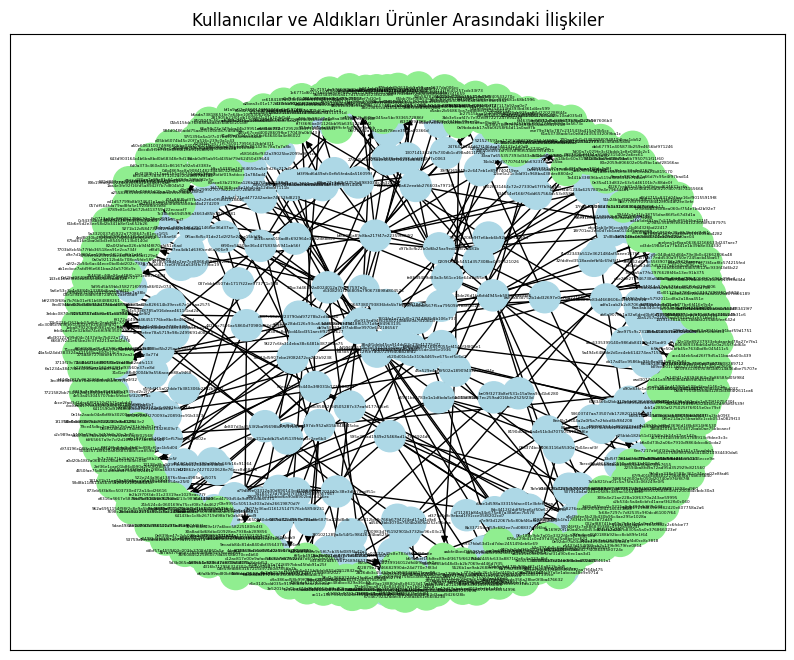

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')

df_orders.isnull().sum()
df_orders.shape
df_orders = df_orders.dropna()
df_orders.isnull().sum()
df_orders.shape
df_order_items
df_order_items.isnull().sum()
df_products
df_products.isnull().sum()
df_products = df_products.dropna()
df_products.shape
df_products.isnull().sum()
df_customers_orders = df_customers.merge(df_orders, on='customer_id')
df_customers_orders
orders_order_items = df_orders.merge(df_order_items, on='order_id')
orders_order_items
top_customer_ids = orders_order_items['customer_id'].value_counts().head(200)
top_customer_data = orders_order_items[orders_order_items['customer_id'].isin(top_customer_ids.index)]
top_customer_data = pd.DataFrame(top_customer_data)
top_customer_data

# İlk 100 satırı al
df_customers_subset = df_customers[df_customers['customer_id'].isin(top_customer_data['customer_id'].unique())]

# Graf oluşturalım
G = nx.DiGraph()

# Kullanıcıları düğümler olarak ekle
for _, row in df_customers_subset.iterrows():
    G.add_node(row['customer_unique_id'])

# Siparişleri ve ürünleri bağlantılar olarak ekle
for _, row in orders_order_items.iterrows():
    df_customers_ids = df_customers_subset.loc[df_customers_subset['customer_id'] == row['customer_id'], 'customer_unique_id'].values
    if len(df_customers_ids) > 0:
        G.add_edge(df_customers_ids[0], row['product_id'])

# Grafı çizelim
plt.figure(figsize=(10, 8))

# Müşteri ve ürün düğümlerini ayırt etmek için renkler
node_colors = ['lightblue' if node in df_customers_subset['customer_unique_id'].values else 'lightgreen' for node in G.nodes]

nx.draw_networkx(G, with_labels=True, node_color=node_colors, node_size=500, font_size=3)
plt.title("Kullanıcılar ve Aldıkları Ürünler Arasındaki İlişkiler")
plt.show()
